In [1]:
# https://github.com/Zhas1ke/data_management
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import pandas as pd
pd.set_option('precision', 2)

# Read data
df = pd.read_json('kolesa.json', encoding='utf-8')
df.shape

(83253, 20)

In [2]:
df.head(3)

,ads_id,age,body,city,color,description,drive,engine_type,helm,link,manufacturer,metallic,mileage,model,options,photos,price,transmission,volume,year
0,37169267,8,кроссовер,Актобе,черный,Состояние отличное один хозяин. 100% не битый ...,,бензин,слева,https://kolesa.kz/a/show/37169267,BMW,1,NaN,X5,,12,6500000,автомат,3.0,2009
1,36835575,10,седан,Алматы,черный,До конца читать! Авто для любителей и ценителе...,передний привод,бензин,слева,https://kolesa.kz/a/show/36835575,Lexus,0,111225.0,ES 350,"тонировка, люк, ветровики, ксенон, хрустальная...",30,5350000,типтроник,3.5,2007
2,37354056,11,седан,Алматы,синий,"Мощный и в то же время экономичный, уверенный ...",полный привод,бензин,слева,https://kolesa.kz/a/show/37354056,Subaru,1,NaN,Impreza,"люк, спойлер, линзованная оптика, корректор фа...",8,3000000,автомат,2.5,2006


In [3]:
# Drop not meaningful columns
df = df.drop(['ads_id', 'link'], axis=1)

In [4]:
df.shape

(83253, 18)

In [5]:
# Column types
df.dtypes

age               int64
body             object
city             object
color            object
description      object
drive            object
engine_type      object
helm             object
manufacturer     object
metallic          int64
mileage         float64
model            object
options          object
photos            int64
price             int64
transmission     object
volume          float64
year              int64
dtype: object

In [6]:
# Numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).dtypes

age           int64
metallic      int64
mileage     float64
photos        int64
price         int64
volume      float64
year          int64
dtype: object

In [7]:
# Categorical variables
df.select_dtypes(exclude=numerics).dtypes

body            object
city            object
color           object
description     object
drive           object
engine_type     object
helm            object
manufacturer    object
model           object
options         object
transmission    object
dtype: object

In [8]:
# Separate datasets for numeric and categorical features
df_numeric = df.select_dtypes(include=numerics)
df_object = df.select_dtypes(exclude=numerics).drop(['description', 'options'], axis=1)

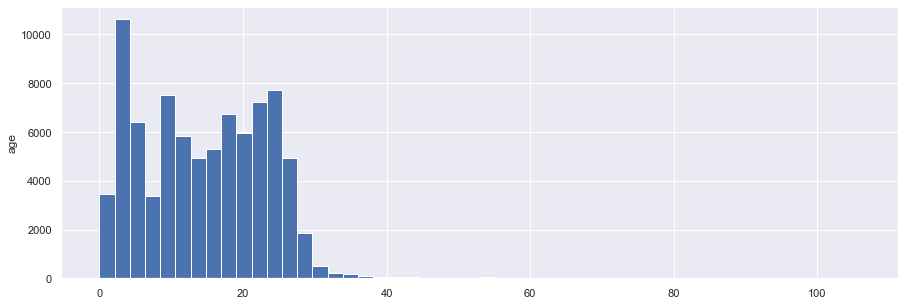

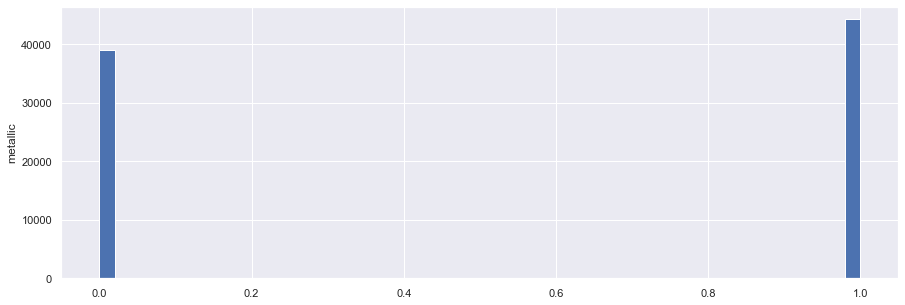

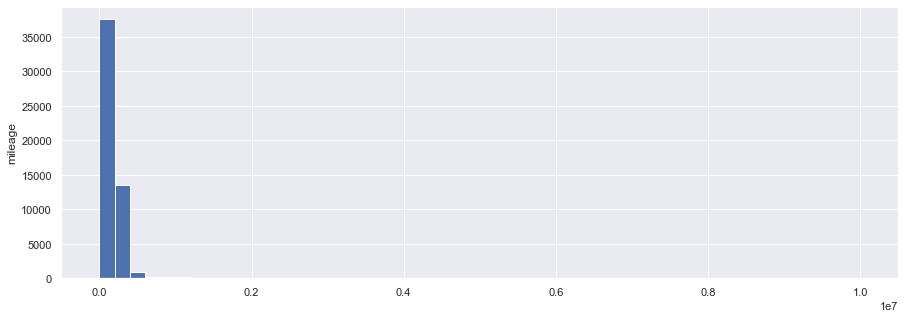

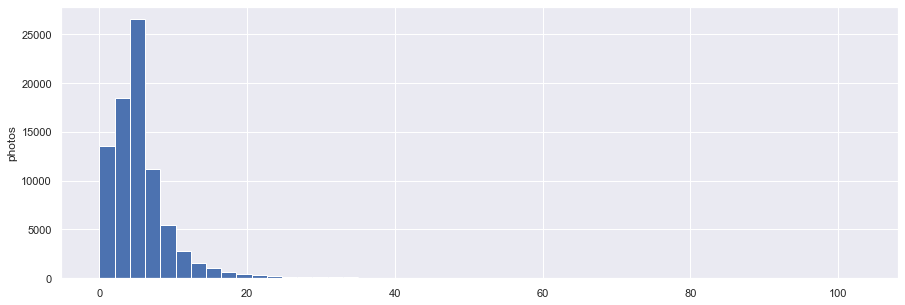

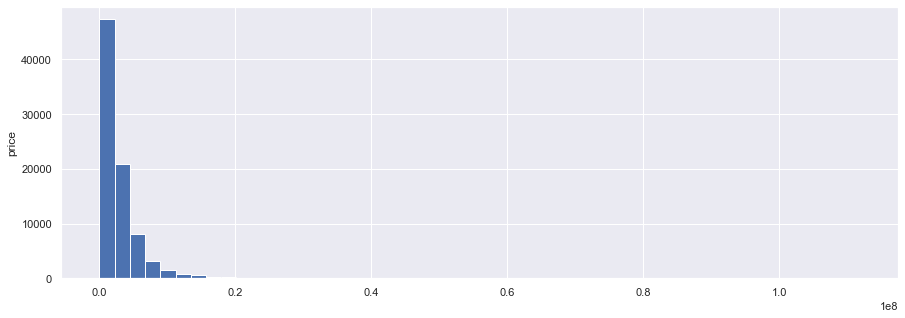

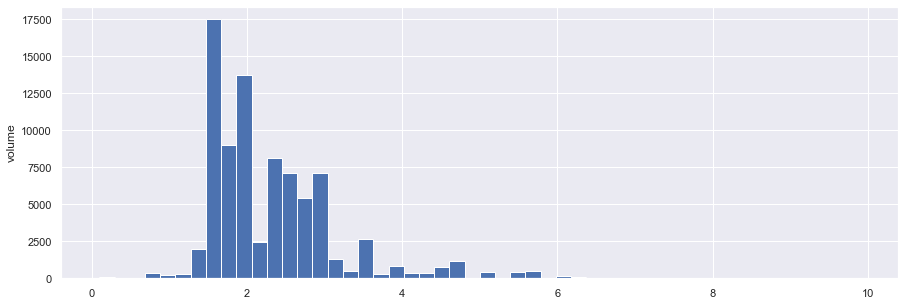

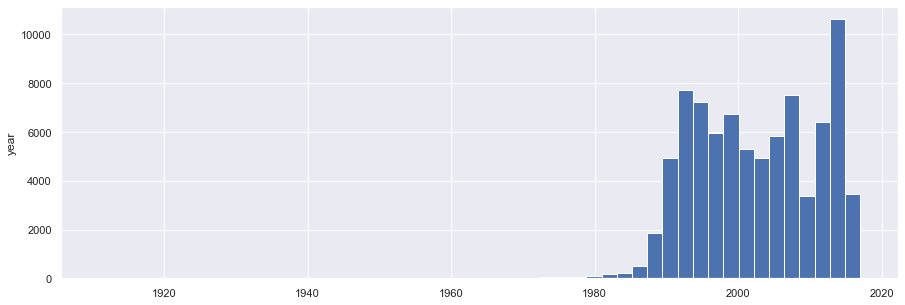

In [9]:
# Histograms for numeric columns
for col in list(df_numeric):
    plt.figure(figsize=(15,5))
    plt.hist(df_numeric[col].dropna(),50)
    plt.ylabel(col)
    plt.show()

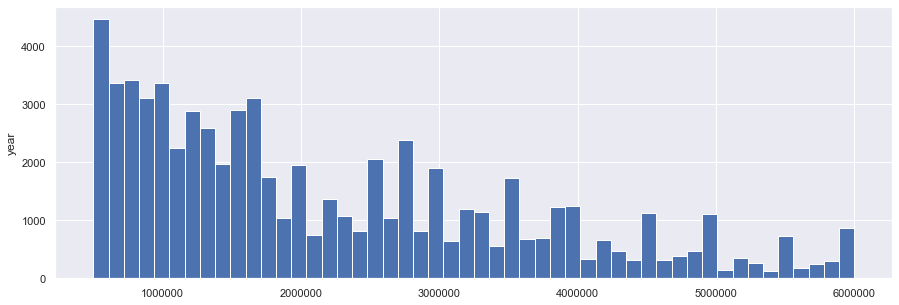

In [10]:
plt.figure(figsize=(15,5))
plt.hist(df_numeric['price'].dropna(),50,  range=[500000, 6000000])
plt.ylabel(col)
plt.show()

In [11]:
# Some statistics
df_numeric.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,age,metallic,mileage,photos,price,volume,year
count,83253.00,83253.00,5.34e+04,83253.00,8.33e+04,83253.00,83253.00
mean,14.64,0.53,2.06e+05,6.01,2.90e+06,2.34,2002.36
std,8.59,0.50,5.12e+05,5.49,3.59e+06,0.88,8.59
min,0.00,0.00,1.00e+00,0.00,2.20e+04,0.10,1911.00
1%,1.00,0.00,2.99e+01,0.00,2.00e+05,1.20,1986.00
5%,3.00,0.00,2.70e+02,0.00,3.80e+05,1.50,1990.00
10%,3.00,0.00,1.23e+04,0.00,5.00e+05,1.60,1992.00
25%,7.00,0.00,6.00e+04,3.00,9.00e+05,1.70,1995.00
50%,14.00,1.00,1.29e+05,5.00,1.80e+06,2.00,2003.00
75%,22.00,1.00,2.28e+05,7.00,3.50e+06,2.70,2010.00


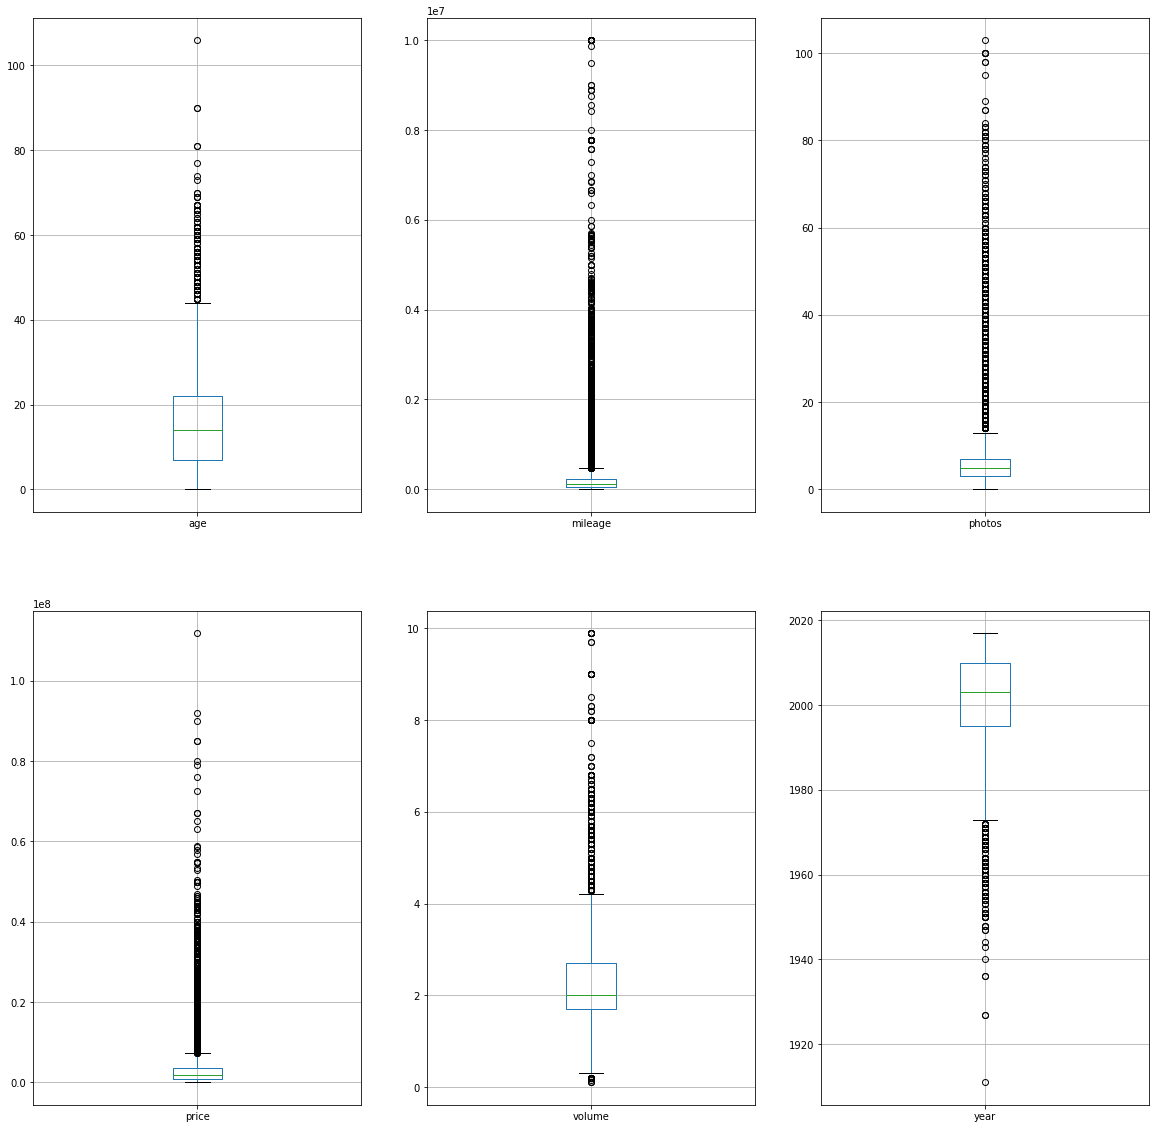

In [8]:
# Box plots
fig, ax = plt.subplots(nrows=2,ncols=3)
fig.set_figheight(20)
fig.set_figwidth(20)

for i in range(len(list(df_numeric.drop(['metallic'],axis=1)))):
    plt.subplot(2,3,i+1)
    df_numeric.drop(['metallic'],axis=1).iloc[:,i].dropna().to_frame().boxplot()
    i+=1
plt.show()

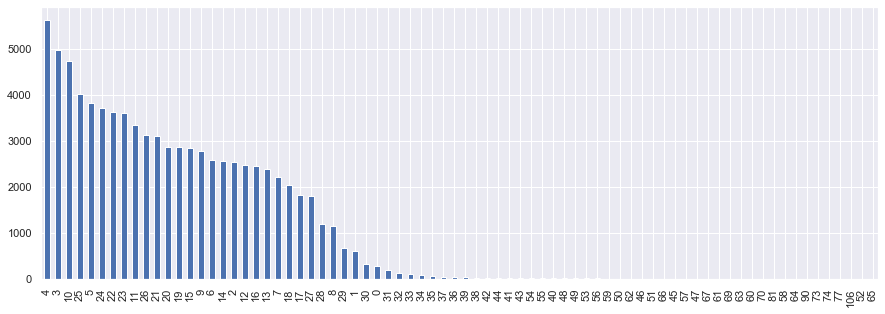

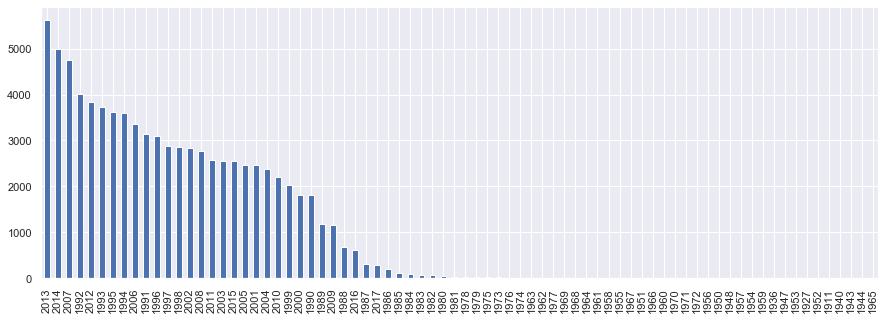

In [12]:
# Age and year by frequency
plt.figure(figsize=(15,5))
df['age'].value_counts().plot.bar()
plt.show()

plt.figure(figsize=(15,5))
df['year'].value_counts().plot.bar()
plt.show()

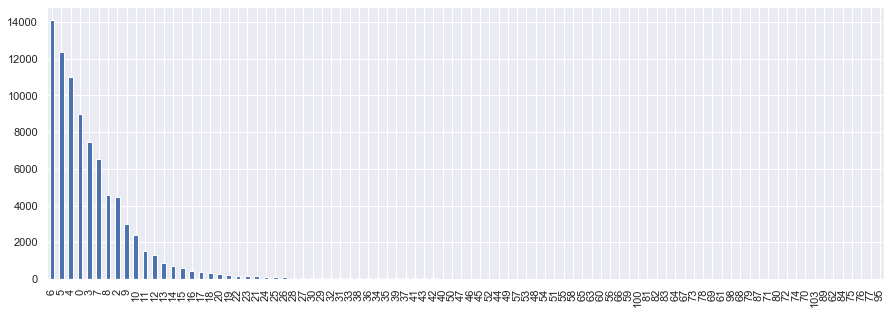

In [13]:
# Number of photos attached
plt.figure(figsize=(15,5))
df['photos'].value_counts().plot.bar()
plt.show()

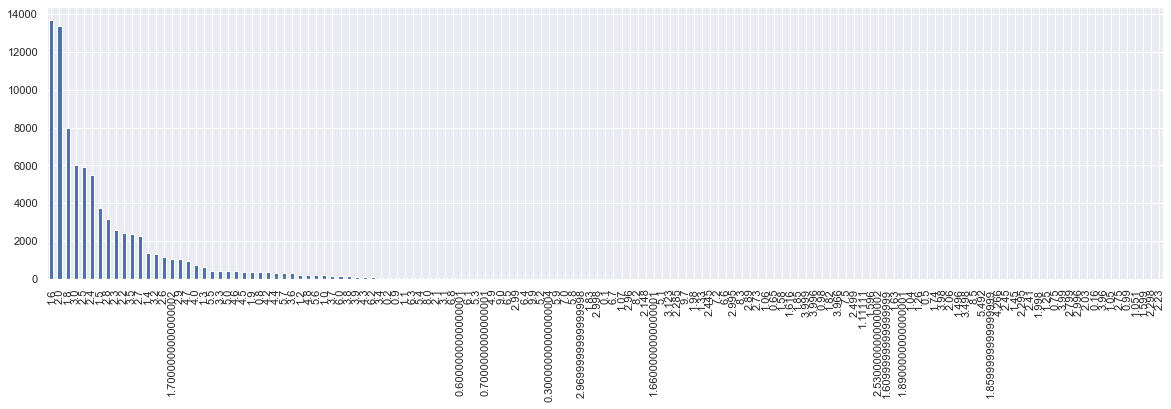

In [16]:
# Volume of engine
plt.figure(figsize=(20,5))
df['volume'].value_counts().plot.bar()
plt.show()

In [293]:
# Remind list of categorical features
df_object.dtypes

body            object
city            object
color           object
drive           object
engine_type     object
helm            object
manufacturer    object
model           object
transmission    object
dtype: object

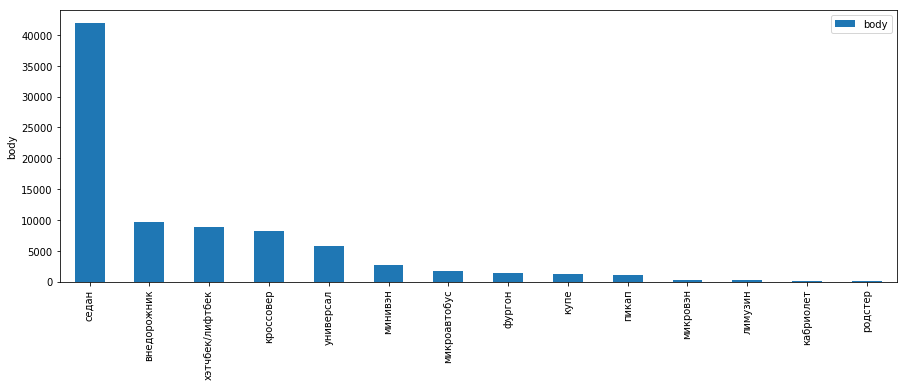

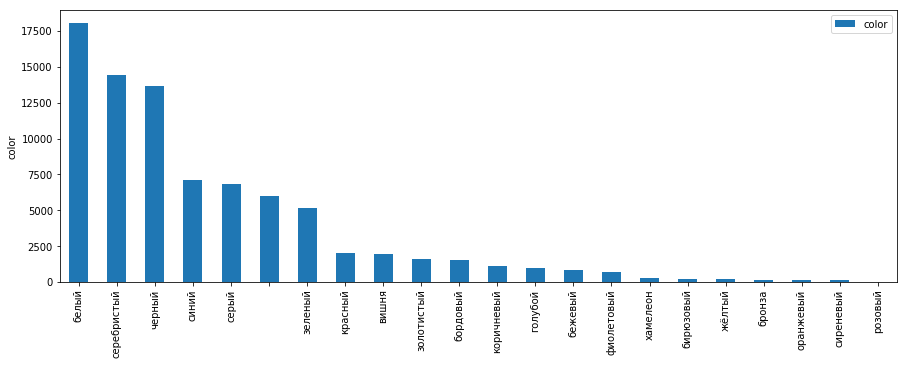

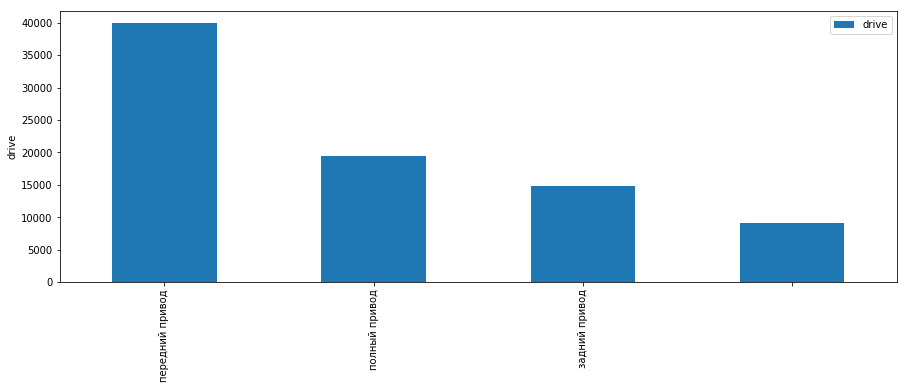

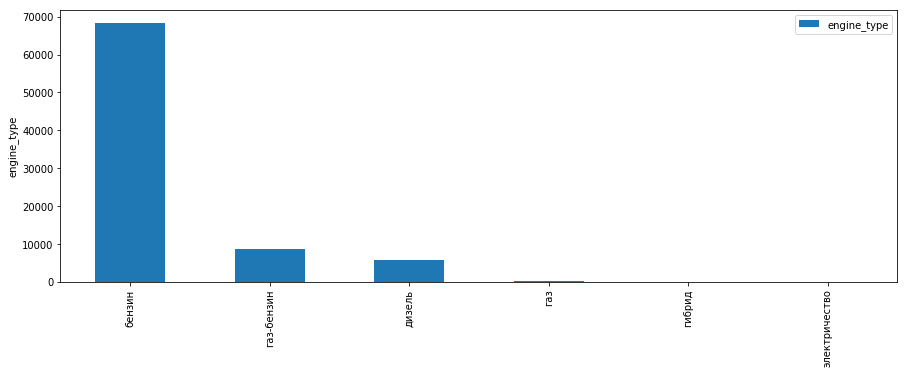

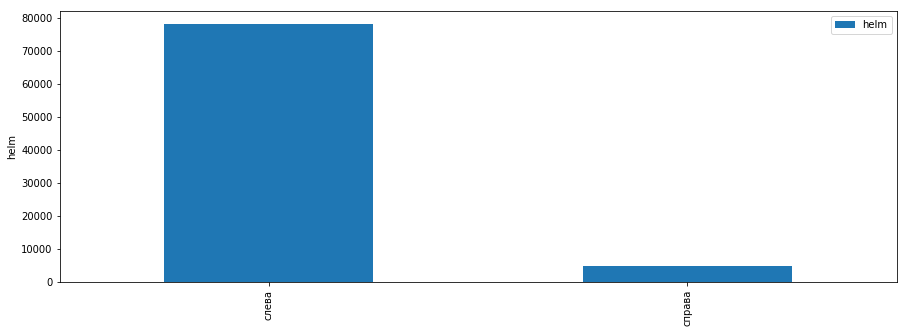

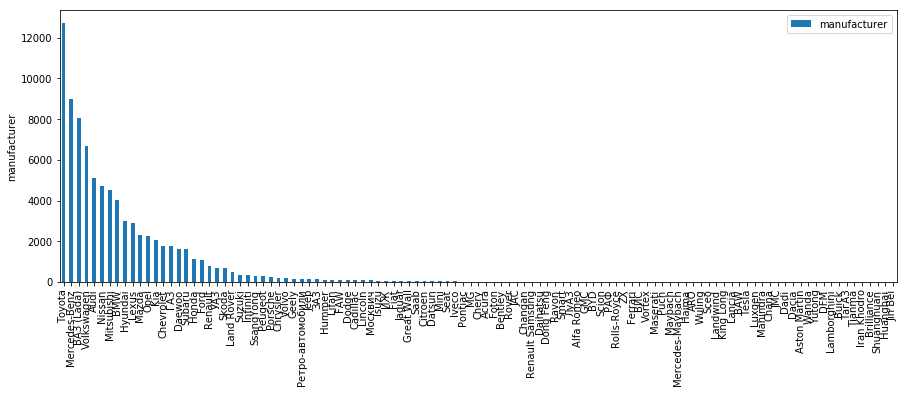

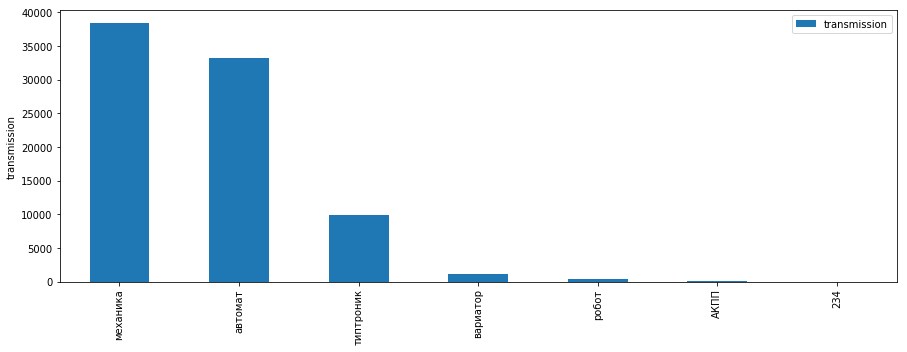

In [46]:
# Let's see categorical features
for col in list(df_object.drop(['model','city'], axis=1)):
    plt.figure(figsize=(15,5))
    df[col].value_counts().plot.bar()
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [309]:
# Top manufacturers
df['manufacturer'].value_counts().nlargest(20)

Toyota           12712
Mercedes-Benz     8990
ВАЗ (Lada)        8064
Volkswagen        6669
Audi              5110
Nissan            4701
Mitsubishi        4497
BMW               4020
Hyundai           3002
Lexus             2902
Mazda             2290
Opel              2252
Kia               2068
Chevrolet         1762
ГАЗ               1758
Daewoo            1638
Subaru            1636
Honda             1117
Ford              1077
Renault            772
Name: manufacturer, dtype: int64

In [303]:
# Top models
df['model_full'] = df['manufacturer'] + ' ' +  df['model']
df['model_full'].value_counts().nlargest(20)

Toyota Camry                 4258
Volkswagen Passat            2526
Audi 100                     1640
Volkswagen Golf              1578
Toyota Land Cruiser Prado    1336
Audi 80                      1239
Opel Vectra                  1184
ВАЗ (Lada) 2114 (хэтчбек)    1074
ВАЗ (Lada) 2170 (седан)      1058
Toyota Corolla               1017
Audi A6                      1012
Toyota Land Cruiser           978
Daewoo Nexia                  934
Mercedes-Benz E 230           891
Mitsubishi Pajero             879
Hyundai Accent                864
Mitsubishi Galant             849
Mazda 626                     846
BMW 525                       787
Mercedes-Benz E 200           786
Name: model_full, dtype: int64

In [314]:
# Top jeeps
df[df['body']=='внедорожник']['model_full'].value_counts().nlargest(10)

Toyota Land Cruiser Prado    1295
Toyota Land Cruiser           961
Mitsubishi Pajero             834
Nissan Patrol                 432
ВАЗ (Lada) 2121 Нива          343
Lexus LX 470                  298
Mitsubishi Montero Sport      293
Lexus LX 570                  207
Toyota Hilux Surf             196
Land Rover Range Rover        184
Name: model_full, dtype: int64

In [313]:
# Electocars
df[df['engine_type']=='электричество']['model_full'].value_counts()

Toyota Prius                     1
Tesla Model X                    1
BMW i3                           1
Ретро-автомобили Ford Model A    1
Geely CK                         1
Tesla Model S                    1
Geely MK                         1
Nissan Leaf                      1
Toyota Avensis                   1
Ретро-автомобили Другая          1
Name: model_full, dtype: int64

In [93]:
# Market share by city
df.city.value_counts().nlargest(50)

Алматы              21960
Астана               9549
Шымкент              5852
Караганда            4863
Актобе               3491
Актау                3304
Усть-Каменогорск     3077
Тараз                2863
Атырау               2836
Костанай             2496
Павлодар             2421
Уральск              2276
Кызылорда            1967
Семей                1794
Кокшетау             1426
Талдыкорган          1286
Петропавловск        1247
Жезказган             785
Туркестан             617
Жанаозен              435
Экибастуз             395
Темиртау              395
Балхаш                353
Рудный                266
Кульсары              235
Талгар                219
Жаркент               217
Есик                  202
Щучинск               200
Каскелен              200
Байконыр              185
Жетысай               176
Кордай                170
Шиели                 150
Риддер                146
Шу                    144
Сарыагаш              144
Мерке                 137
Сатпаев     

In [70]:
# Analyze numeric variables
df[['price', 'year','mileage']].corr()

,price,year,mileage
price,1.0,0.5,-0.1
year,0.5,1.0,-0.2
mileage,-0.1,-0.2,1.0


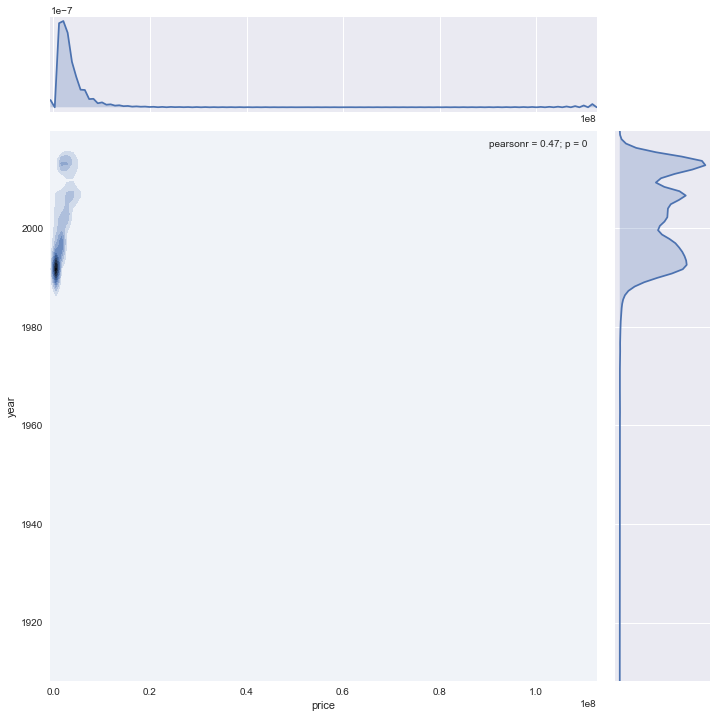

In [83]:
sns.jointplot(x="price", y="year", data=df[['price', 'year']].dropna(), kind="kde", ylim=(1992,2017),xlim=(500000,10000000), size=10, aspect=10)
plt.show()

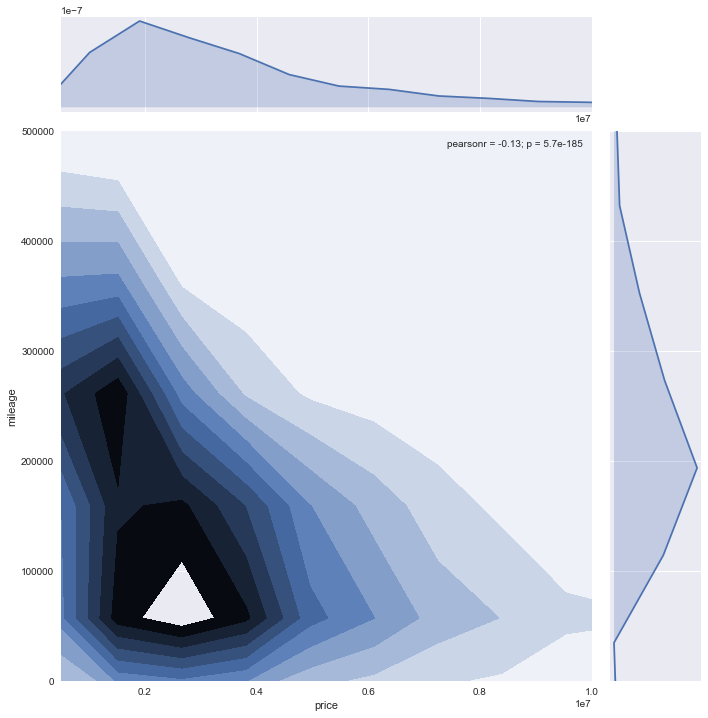

In [81]:
sns.jointplot(x="price", y="mileage", data=df[['price', 'mileage']].dropna(), kind="kde", ylim=(0,500000),xlim=(500000,10000000), size=10, aspect=10)
plt.show()

In [88]:
import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(df[df['city'] == 'Актобе']['price'], df[df['city'] == 'Актау']['price'], equal_var=False)
t_stat, p_val
# print (df[df['city'] == 'Алматы'].shape)
# print (df[df['city'] == 'Астана'].shape)

(-14.424055061837997, 2.0694146528396429e-46)

In [12]:
t_stat, p_val = stats.ttest_ind(df.dropna()['price'], df.dropna()['mileage'], equal_var=False)
t_stat, p_val

(181.73642449305552, 0.0)

In [86]:
from scipy.stats import shapiro
for col in ['price', 'year','mileage']:
    print (col, shapiro(df[col].dropna()))

price (0.6016503572463989, 0.0)
year (0.9394295811653137, 0.0)
mileage (0.24855589866638184, 0.0)


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import normaltest
for col in ['price', 'year','mileage']:
    print (col, normaltest(df[col].dropna()))

In [92]:
from scipy.stats import mannwhitneyu
# stat, pvalue = mannwhitneyu(df['price'], df['year'])
# print (stat, pvalue)

# stat, pvalue = mannwhitneyu(df.dropna()['price'], df.dropna()['mileage'])
# print (stat, pvalue)

# df[df['body']=='внедорожник']['model_full']
stat, pvalue = mannwhitneyu(df[df['city'] == 'Актобе']['price'], df[df['city'] == 'Актау']['price'], alternative='greater')
print (stat, pvalue)

4392103.0 1.0


In [13]:
# And idea - to visualize cities on a map
vc = df[['city','price']].groupby('city', as_index=False).count().sort_values(by='price', ascending=False)\
        .rename(columns={'price':'count'}).reset_index(drop=True)
vc['count'] = vc['count'].astype('int')
vc.head()

,city,count
0,Алматы,21960
1,Астана,9549
2,Шымкент,5852
3,Караганда,4863
4,Актобе,3491


In [13]:
coord = []

# Let's parse city coordinates
import requests
for city in vc['city']:
    print (city)
    try:
        link = 'http://geocode-maps.yandex.ru/1.x/?format=json&geocode=' + city + '&results=1'
        r = requests.get(link).json()
        pair = r['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
        print (pair)
        x, y = pair.split(' ')
        adm_name = r['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['metaDataProperty']['GeocoderMetaData']['AddressDetails']['Country']['AdministrativeArea']['AdministrativeAreaName']
        coord.append( {
                'city':city,
                'x':x,
                'y':y,
                'adm_name': adm_name
            }
        )
        print (city,x,y,adm_name)
    except:
        pass

Алматы
76.945456 43.238286
Алматы 76.945456 43.238286 Алматы
Астана
71.430564 51.128422
Астана 71.430564 51.128422 Астана
Шымкент
69.586907 42.315514
Шымкент 69.586907 42.315514 Южно-Казахстанская область
Караганда
73.085485 49.806406
Караганда 73.085485 49.806406 Карагандинская область
Актобе
57.154636 50.300411
Актобе 57.154636 50.300411 Актюбинская область
Актау
51.169135 43.635379
Актау 51.169135 43.635379 Мангистауская область
Усть-Каменогорск
82.628459 49.948759
Усть-Каменогорск 82.628459 49.948759 Восточно-Казахстанская область
Тараз
71.378309 42.901183
Тараз 71.378309 42.901183 Жамбылская область
Атырау
51.90313 47.106719
Атырау 51.90313 47.106719 Атырауская область
Костанай
63.631031 53.214917
Костанай 63.631031 53.214917 Костанайская область
Павлодар
76.940947 52.285577
Павлодар 76.940947 52.285577 Павлодарская область
Уральск
51.367842 51.212291
Уральск 51.367842 51.212291 Западно-Казахстанская область
Кызылорда
65.50268 44.83986
Кызылорда 65.50268 44.83986 Кызылординская об

In [18]:
coord_dict['adm_name'].value_counts()

Алматинская область                         25
Восточно-Казахстанская область              24
Акмолинская область                         23
Карагандинская область                      20
Костанайская область                        19
Южно-Казахстанская область                  14
Западно-Казахстанская область               12
Северо-Казахстанская область                12
Актюбинская область                         11
Жамбылская область                          11
Павлодарская область                        10
Кызылординская область                       9
Атырауская область                           8
Мангистауская область                        7
Алматы                                       3
Самарская область                            3
Омская область                               3
Алтайский край                               2
Республика Саха (Якутия)                     2
Москва                                       2
Республика Башкортостан                      2
Оренбургская 

In [25]:
coord_dict = pd.DataFrame(coord)
coord_dict.head()
coord_dict.to_csv('coord.csv', index=None)

In [14]:
coord_dict = pd.read_csv('coord.csv', encoding='cp1251')
coord_dict.head()

,adm_name,city,x,y
0,Алматы,Алматы,76.9,43.2
1,Астана,Астана,71.4,51.1
2,Южно-Казахстанская область,Шымкент,69.6,42.3
3,Карагандинская область,Караганда,73.1,49.8
4,Актюбинская область,Актобе,57.2,50.3


In [15]:
result = pd.merge(coord_dict, vc, how='inner', on='city')
result.head()

,adm_name,city,x,y,count
0,Алматы,Алматы,76.9,43.2,21960
1,Астана,Астана,71.4,51.1,9549
2,Южно-Казахстанская область,Шымкент,69.6,42.3,5852
3,Карагандинская область,Караганда,73.1,49.8,4863
4,Актюбинская область,Актобе,57.2,50.3,3491


In [16]:
# We need to align region names with names from shape file
mapper = pd.DataFrame.from_dict({
'Алматинская область':'Almaty',
'Восточно-Казахстанская область':'East Kazakhstan',
'Акмолинская область':'Aqmola',
'Карагандинская область':'Qaraghandy',
'Костанайская область':'Qostanay',
'Южно-Казахстанская область':'South Kazakhstan',
'Западно-Казахстанская область':'West Kazakhstan',
'Северо-Казахстанская область':'North Kazakhstan',
'Актюбинская область':'Aqtöbe',
'Жамбылская область':'Zhambyl',
'Павлодарская область':'Pavlodar',
'Кызылординская область':'Qyzylorda',
'Атырауская область':'Atyrau',
'Мангистауская область':'Mangghystau',
'Алматы':'Almaty',
'Астана':'Aqmola'
}, orient='index').reset_index()
mapper.columns=['adm_name', 'NAME_1']
mapper.head(3)

,adm_name,NAME_1
0,Актюбинская область,Aqtöbe
1,Акмолинская область,Aqmola
2,Кызылординская область,Qyzylorda


In [17]:
result = pd.merge(result, mapper, how='left', on='adm_name')
result.head(3)

,adm_name,city,x,y,count,NAME_1
0,Алматы,Алматы,76.9,43.2,21960,Almaty
1,Астана,Астана,71.4,51.1,9549,Aqmola
2,Южно-Казахстанская область,Шымкент,69.6,42.3,5852,South Kazakhstan


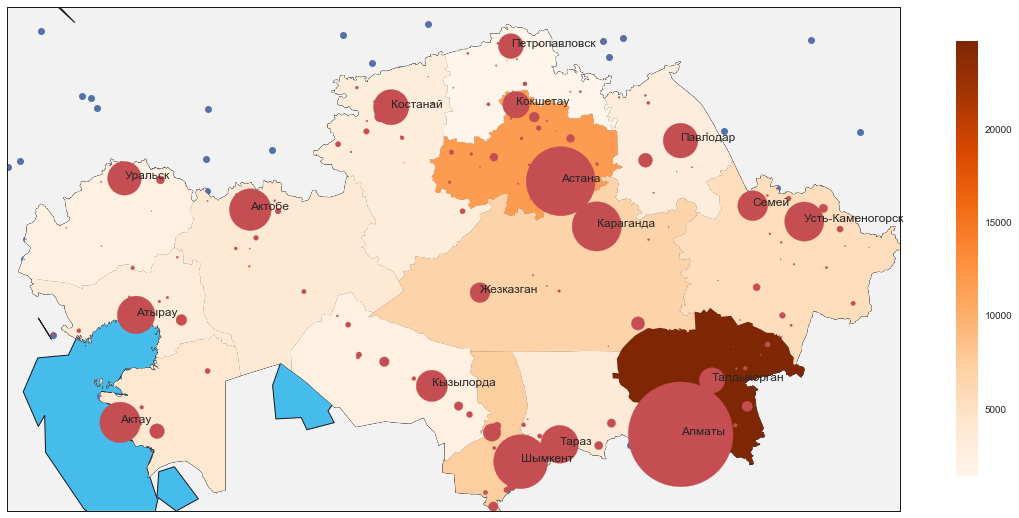

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib

fig, ax = plt.subplots(figsize=(20,20))
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lon_0=50.074321, lat_0=67.695449,
            llcrnrlat=40.622341, llcrnrlon=45.974746,
            urcrnrlat=55.897036, urcrnrlon=87.031387
            )

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.drawmapboundary()

lons = list(result.x)
lats = list(result.y)
labels = result['city'][:18]

# Draw city points
x,y = m(lons, lats)
size = result['count']/2.0
m.scatter(x, y, s=size, c='r', marker='o', zorder=4)
m.plot(x, y, 'bo')

# Country border
m.readshapefile('./KAZ_adm_shp/KAZ_adm0', 'KAZ_adm_shp0')

# Region borders
m.readshapefile('./KAZ_adm_shp/KAZ_adm1', 'KAZ_adm_shp1')

# Add color to the regions
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=3)
norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['count'].fillna(0).values)))
ax.add_collection(pc)

# City names
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label, zorder=5,size='large')

# legend
color_mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
color_mapper.set_array(df_poly['count'])
plt.colorbar(color_mapper, shrink=0.4)

m

In [6]:
df['model_new'] = df['manufacturer'] + ' ' +  df['model'] + ' ' +  df['year'].astype(str)
df['model_new'].value_counts()[:20]

Toyota Camry 2007                 543
ВАЗ (Lada) 2114 (хэтчбек) 2013    495
Audi 100 1991                     402
Volkswagen Passat 1991            372
Audi 100 1992                     366
Toyota Camry 2005                 339
ВАЗ (Lada) 2170 (седан) 2013      333
Volkswagen Golf 1993              319
Volkswagen Golf 1992              316
Toyota Camry 2006                 308
Audi 80 1992                      299
Daewoo Nexia 2013                 291
Volkswagen Passat 1992            289
Kia Rio 2014                      288
Audi 100 1993                     284
Toyota Camry 2002                 281
Toyota Camry 2012                 281
ВАЗ (Lada) 2170 (седан) 2014      280
Hyundai Accent 2014               274
ВАЗ (Lada) 2114 (хэтчбек) 2012    266
Name: model_new, dtype: int64

In [13]:
df_mean_prices = df.groupby(['manufacturer', 'model', 'year'], as_index=None).mean()[['manufacturer', 'model', 'year', 'price']]
mean_by_region = df.groupby(['manufacturer', 'model', 'year','city'], as_index=None).mean()[['manufacturer', 'model', 'year', 'price','city']]
mean_by_color = df.groupby(['manufacturer', 'model', 'year','city','color'], as_index=None).mean()[['manufacturer', 'model', 'year', 'price','city','color']]
mean_by_volume = df.groupby(['manufacturer', 'model', 'year','city','color','volume'], as_index=None).mean()[['manufacturer', 'model', 'year', 'price','city','color','volume']]
mean_by_transmission = df.groupby(['manufacturer', 'model', 'year','city','color','volume','transmission'], as_index=None).mean()[['manufacturer', 'model', 'year', 'price','city','color','volume','transmission']]


mean_prices = mean_prices.rename(columns={'price':'mean_price'})
mean_by_region = mean_by_region.rename(columns={'price':'mean_by_region'})
mean_by_color = mean_by_color.rename(columns={'price':'mean_by_color'})
mean_by_volume = mean_by_volume.rename(columns={'price':'mean_by_volume'})
mean_by_transmission = mean_by_transmission.rename(columns={'price':'mean_by_transmission'})


df_with_mean = pd.merge(df, mean_prices, how='left', on=['manufacturer', 'model', 'year'])
df_with_mean = pd.merge(df_with_mean, mean_by_region, how='left', on=['manufacturer', 'model', 'year','city'])
df_with_mean = pd.merge(df_with_mean, mean_by_color, how='left', on=['manufacturer', 'model', 'year','city','color'])
df_with_mean = pd.merge(df_with_mean, mean_by_volume, how='left', on=['manufacturer', 'model', 'year','city','color','volume'])
df_with_mean = pd.merge(df_with_mean, mean_by_transmission, how='left', on=['manufacturer', 'model', 'year','city','color','volume','transmission'])

df_with_mean.head()
print ('mean_price', mae(df_with_mean['price'], df_with_mean['mean_price']))
print ('mean_by_region', mae(df_with_mean['price'], df_with_mean['mean_by_region']))
print ('mean_by_color', mae(df_with_mean['price'], df_with_mean['mean_by_color']))
print ('mean_by_volume', mae(df_with_mean['price'], df_with_mean['mean_by_volume']))
print ('mean_by_transmission', mae(df_with_mean['price'], df_with_mean['mean_by_transmission']))
print (df_with_mean[(df['city'] == 'Алматы') \
                   &(df['manufacturer'] == 'Volkswagen') \
                   &(df['model'] == 'Polo')  \
                   &(df['year'] == 2015) \
                   &(df['volume'] == 1.6)  \
                   &(df['color'] == 'белый') \
                    ][['manufacturer', 'model', 'year','city','color','volume','transmission', \
                      'mean_price', 'mean_by_region', 'mean_by_color', 'mean_by_volume', 'mean_by_transmission']].drop_duplicates())

mean_price 319055.839098
mean_by_region 205352.347125
mean_by_color 111603.273685
mean_by_volume 82724.9628541
mean_by_transmission 63395.6702203
      manufacturer model  year    city  color  volume transmission  \
6582    Volkswagen  Polo  2015  Алматы  белый     1.6     механика   
45058   Volkswagen  Polo  2015  Алматы  белый     1.6      автомат   
76185   Volkswagen  Polo  2015  Алматы  белый     1.6    типтроник   

       mean_price  mean_by_region  mean_by_color  mean_by_volume  \
6582      3.3e+06         3.4e+06        3.1e+06         3.1e+06   
45058     3.3e+06         3.4e+06        3.1e+06         3.1e+06   
76185     3.3e+06         3.4e+06        3.1e+06         3.1e+06   

       mean_by_transmission  
6582                3.0e+06  
45058               3.3e+06  
76185               3.6e+06  


In [17]:
# df = df.drop(['description'], axis=1)
df.head(3)
df.shape
for i in list(df_object):
    print (i, df[i].value_counts().shape)

body (14,)
city (284,)
color (22,)
drive (4,)
engine_type (6,)
helm (2,)
link (83253,)
manufacturer (109,)
model (1417,)
transmission (7,)
model_new (8382,)


In [7]:
label = ['city', 'manufacturer', 'model']
onehot = ['body', 'color', 'drive', 'engine_type', 'helm', 'transmission']

df_onehot = pd.get_dummies(df[onehot])
df_onehot.head()

,body_внедорожник,body_кабриолет,body_кроссовер,body_купе,body_лимузин,body_микроавтобус,body_микровэн,body_минивэн,body_пикап,body_родстер,...,engine_type_электричество,helm_слева,helm_справа,transmission_234,transmission_АКПП,transmission_автомат,transmission_вариатор,transmission_механика,transmission_робот,transmission_типтроник
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [8]:
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()
le.fit(np.unique(df[label].values))
df_label = df[label].apply(le.transform)
df_label.head()

,city,manufacturer,model
0,1509,313,1441
1,1512,902,583
2,1512,1305,805
3,1710,1030,1028
4,1769,1149,970


In [10]:
df_numeric.shape
df_object.shape

data = pd.concat([df_numeric, df_onehot, df_label], axis=1)
data.head()

,age,metallic,mileage,photos,price,volume,year,body_внедорожник,body_кабриолет,body_кроссовер,...,transmission_234,transmission_АКПП,transmission_автомат,transmission_вариатор,transmission_механика,transmission_робот,transmission_типтроник,city,manufacturer,model
0,8,1,NaN,12,6500000,3.0,2009,0,0,1,...,0,0,1,0,0,0,0,1509,313,1441
1,10,0,111225.0,30,5350000,3.5,2007,0,0,0,...,0,0,0,0,0,0,1,1512,902,583
2,11,1,NaN,8,3000000,2.5,2006,0,0,0,...,0,0,1,0,0,0,0,1512,1305,805
3,21,1,132138.0,8,850000,2.5,1996,0,0,0,...,0,0,1,0,0,0,0,1710,1030,1028
4,16,1,185000.0,8,1600000,1.6,2001,0,0,0,...,0,0,1,0,0,0,0,1769,1149,970


In [11]:
X = data.drop(['price'], axis=1)
y = data['price']

X = X.fillna(X.median(axis=0), axis=0)
X.head()

,age,metallic,mileage,photos,volume,year,body_внедорожник,body_кабриолет,body_кроссовер,body_купе,...,transmission_234,transmission_АКПП,transmission_автомат,transmission_вариатор,transmission_механика,transmission_робот,transmission_типтроник,city,manufacturer,model
0,8,1,129000.0,12,3.0,2009,0,0,1,0,...,0,0,1,0,0,0,0,1509,313,1441
1,10,0,111225.0,30,3.5,2007,0,0,0,0,...,0,0,0,0,0,0,1,1512,902,583
2,11,1,129000.0,8,2.5,2006,0,0,0,0,...,0,0,1,0,0,0,0,1512,1305,805
3,21,1,132138.0,8,2.5,1996,0,0,0,0,...,0,0,1,0,0,0,0,1710,1030,1028
4,16,1,185000.0,8,1.6,2001,0,0,0,0,...,0,0,1,0,0,0,0,1769,1149,970


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# scaler = StandardScaler()
# clf = LinearRegression()
# clf.fit(scaler.fit_transform(X),y)

# clf = RandomForestRegressor()
# clf.fit(X,y)

clf = DecisionTreeRegressor(random_state=12345)
clf.fit(X,y)

X.to_csv('X.csv', index=None, sep=';')
y.to_csv('y.csv', index=None, sep=';')

In [95]:
from sklearn.metrics import mean_absolute_error as mae #y_true, y_pred
print (mae(y, clf.predict(X)))
imp = pd.DataFrame(list(X), clf.feature_importances_).reset_index()
imp.columns = ['importance','feature']
imp.sort(columns='importance', axis=0, ascending=False)[:20]
# ['mileage', 'photos', 'city', 'model', 'volume', 'metallic', 'year', 'manufacturer', 'year', 'color', 'transmission']
# Linear regression, decision tree and random forest, however let's check feature importance

549763.384178


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,importance,feature
2,1.3e-01,mileage
61,1.0e-01,city
63,1.0e-01,model
3,1.0e-01,photos
5,7.9e-02,year
4,7.6e-02,volume
62,5.9e-02,manufacturer
0,5.9e-02,age
1,2.6e-02,metallic
20,1.5e-02,color_


In [96]:
imp['importance'].sum()

1.0

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)

clf = DecisionTreeRegressor(random_state=12345, max_depth=14)
clf.fit(X_train, y_train)
print (mae(y_test, clf.predict(X_test)))

609754.587322


In [40]:
X_train_mean_prices = pd.concat([X_train, y_train], axis=1).groupby(['manufacturer', 'model', 'year'], as_index=None).mean()[['manufacturer', 'model', 'year', 'price']]
X_train_mean_prices = X_train_mean_prices.rename(columns={'price':'mean_price'})
X_train_mean_prices.head()
# mae for current (mean-based) logic, which is on the site

# let's make it more detailed - it worked worse
X_test_with_mean = pd.merge(X_test, X_train_mean_prices, how='left', on=['manufacturer', 'model', 'year'])['mean_price']
X_test_with_mean = X_test_with_mean.fillna(y_train.median(axis=0), axis=0)
X_test_with_mean.head()
print (mae(y_test, X_test_with_mean))

# more details - more error
X_train_mean_prices_by_region = pd.concat([X_train, y_train], axis=1).groupby(['manufacturer', 'model', 'year','city'], as_index=None).mean()[['manufacturer', 'model', 'year', 'price','city']]
X_train_mean_prices_by_region = X_train_mean_prices_by_region.rename(columns={'price':'mean_price_by_region'})

X_test_with_mean = pd.merge(X_test, X_train_mean_prices_by_region, how='left', on=['manufacturer', 'model', 'year','city'])['mean_price_by_region']
X_test_with_mean = X_test_with_mean.fillna(y_train.median(axis=0), axis=0)
print (mae(y_test, X_test_with_mean))

515852.504496
931616.996943


In [79]:
import xgboost as xgb

# xgboost with random parameters
reg = xgb.XGBRegressor(colsample_bylevel= 0.7,
#                        eval_metric= 'mae',
                       learning_rate= 0.01,
                       min_child_weight= 18.0,
                       subsample= 0.15,
                       silent= 1,
                       seed= 12345,
                       colsample_bytree= 0.95,
                       max_depth= 11,
                       objective= 'reg:linear',
                       n_estimators= 2400)
reg.fit(X_train, y_train)
print (mae(y_test, reg.predict(X_test)))

463062.025367


In [98]:
# xgboost with tuned parameters
reg = xgb.XGBRegressor(colsample_bylevel= 0.45,
                       learning_rate= 0.01,
                       min_child_weight= 13.0,
                       subsample= 0.8,
                       silent= 1,
                       seed= 12345,
                       colsample_bytree= 0.25,
                       max_depth= 14,
                       objective= 'reg:linear',
                       n_estimators= 7373)
reg.fit(X_train, y_train)
print (mae(y_test, reg.predict(X_test)))

431588.97418


In [100]:
# feature importance
xgb_imp = pd.DataFrame(list(X_train), reg.feature_importances_).reset_index()
xgb_imp.columns = ['importance','feature']
xgb_imp.sort(columns='importance', axis=0, ascending=False)[:20]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,importance,feature
2,1.0e-01,mileage
63,9.8e-02,model
62,8.0e-02,manufacturer
61,7.9e-02,city
0,7.8e-02,age
3,7.6e-02,photos
4,7.1e-02,volume
5,6.9e-02,year
1,2.4e-02,metallic
56,1.8e-02,transmission_автомат


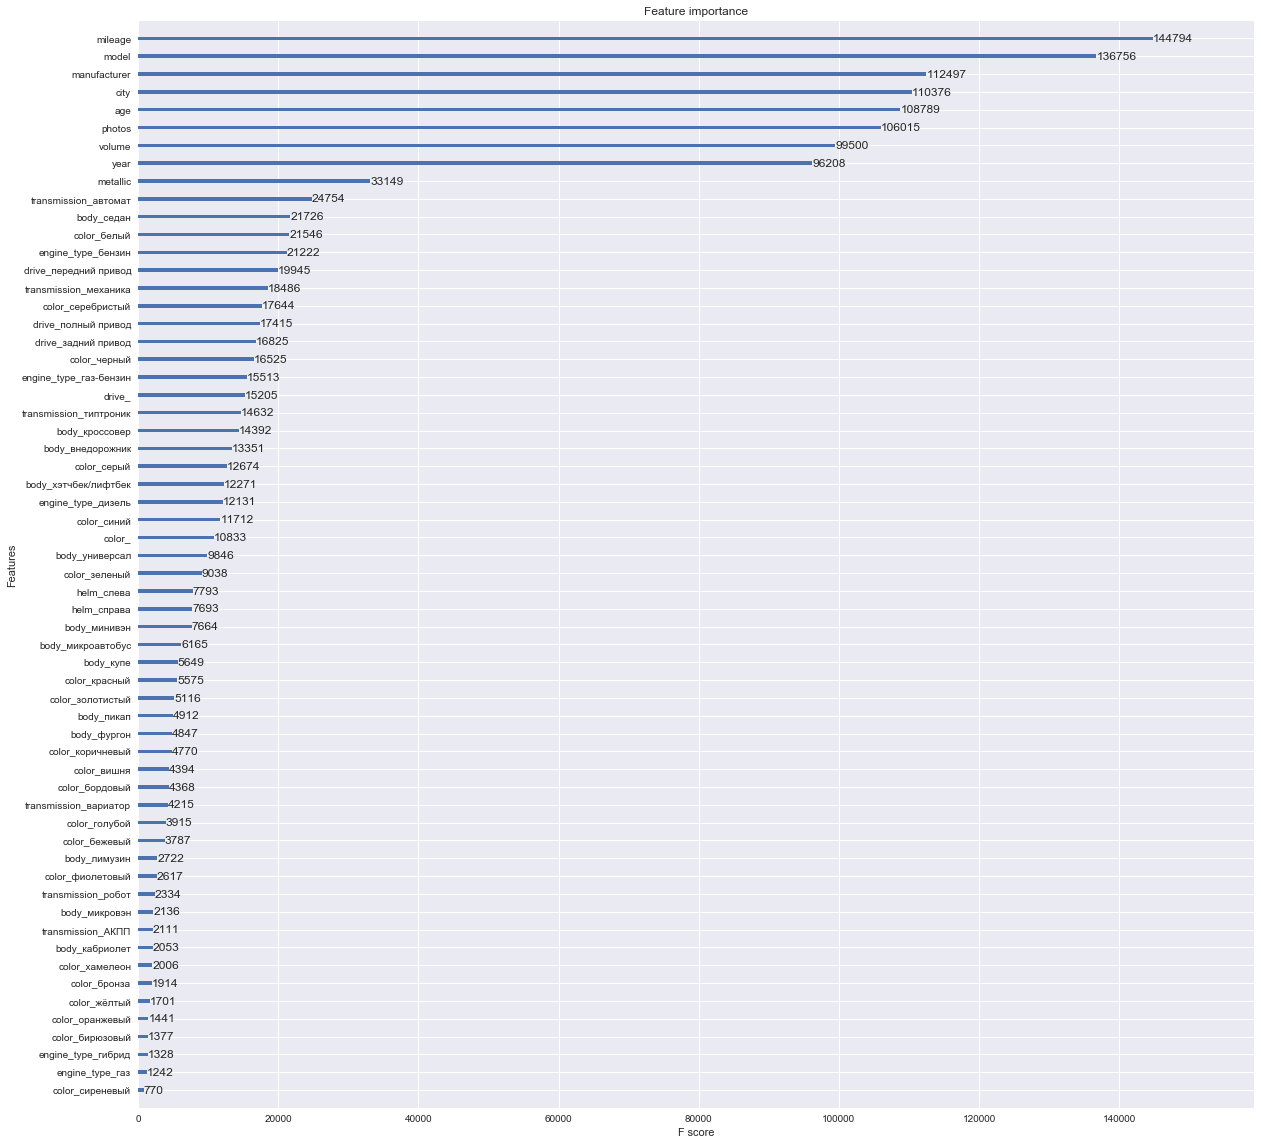

In [109]:
# let's plot feature importance
from xgboost import plot_importance
ax = plot_importance(reg)
fig = ax.figure
fig.set_size_inches(20, 20)
plt.show()